In [1]:
import h5py
import matplotlib.pyplot as plt
import os
from transformers import BridgeTowerModel, BridgeTowerProcessor
import torch
import numpy as np
import seaborn as sns
import re

c:\Users\Bridget Leonard\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("C:\\Users\\Bridget Leonard\\Desktop\\DNN_fMRI")

# Part 2: Feature Extraction
Now that we've been introduced to BridgeTower and how it can be used to extract feature vectors from movies, let's apply this to the original dataset. The stimuli used in the original experiments were movie clips (https://gin.g-node.org/gallantlab/shortclips/src/master/stimuli) and transcripts of stories (https://openneuro.org/datasets/ds003070). We will do forward passess of each into our model to extract feature vectors.

## 1 Movie Stimuli
There are 12 training movies (0-11) and 1 test movie. We should end this first part with 13 datasets each containing 270-300 feature vectors with 768 dimensions each (8100-9000 images presented at 15 frames per second, average over every 2 seconds).

Our movie stimuli is in hdf5 format such that each file in `stimuli` contains:
    stimuli: array of shape (n_images, 512, 512, 3)
        Each training run contains 9000 images total.
        The test run contains 8100 images total.

In [4]:
os.chdir("bridgetower")
from bridgetower_functions import load_hdf5_array
os.chdir("..")

### 1.1 Check feature vector extraction with test video

In [5]:
test = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\test.hdf', key='stimuli')


(8100, 512, 512, 3)


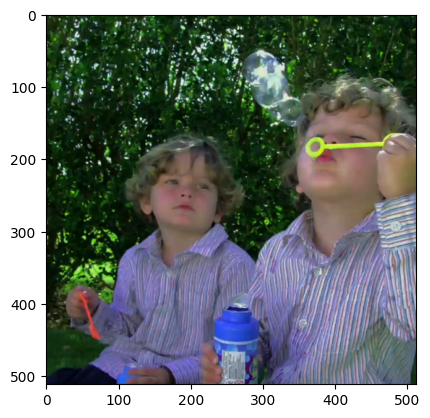

In [6]:
print(test.shape)
plt.imshow(test[0])

### 1.2 Load functions
Let's create some quick functions to streamline the process of extracting features from the video

In [7]:
os.chdir("bridgetower")
from bridgetower_functions import get_movie_features
os.chdir("..")

In [15]:
test_data = get_movie_features(test)

0.37% complete
0.74% complete
1.11% complete
1.48% complete
1.85% complete
2.22% complete
2.59% complete
2.96% complete
3.33% complete
3.7% complete
4.07% complete
4.44% complete
4.81% complete
5.19% complete
5.56% complete
5.93% complete
6.3% complete
6.67% complete
7.04% complete
7.41% complete
7.78% complete
8.15% complete
8.52% complete
8.89% complete
9.26% complete
9.63% complete
10.0% complete
10.37% complete
10.74% complete
11.11% complete
11.48% complete
11.85% complete
12.22% complete
12.59% complete
12.96% complete
13.33% complete
13.7% complete
14.07% complete
14.44% complete
14.81% complete
15.19% complete
15.56% complete
15.93% complete
16.3% complete
16.67% complete
17.04% complete
17.41% complete
17.78% complete
18.15% complete
18.52% complete
18.89% complete
19.26% complete
19.63% complete
20.0% complete
20.37% complete
20.74% complete
21.11% complete
21.48% complete
21.85% complete
22.22% complete
22.59% complete
22.96% complete
23.33% complete
23.7% complete
24.07% co

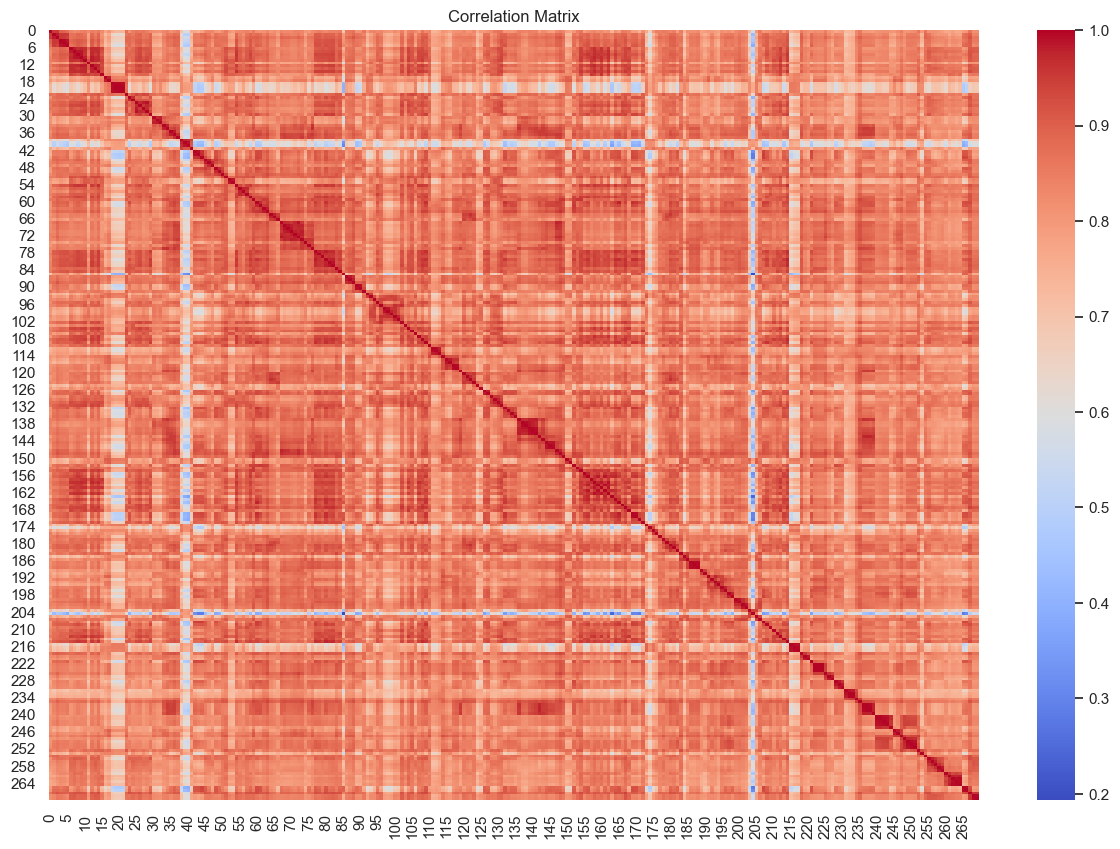

In [29]:
# Calculate correlation matrix
correlation_matrix = torch.zeros((len(test_data['layer_8']), len(test_data['layer_8'])))

for i, tensor_i in enumerate(test_data['layer_8']):
    for j, tensor_j in enumerate(test_data['layer_8']):
        similarity = torch.nn.functional.cosine_similarity(tensor_i.unsqueeze(0), tensor_j.unsqueeze(0))
        correlation_matrix[j, i] = similarity

correlation_matrix_numpy = correlation_matrix.numpy()

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(np.transpose(correlation_matrix_numpy), cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

### 1.3 Save feature vectors

In [31]:
test_data = np.array(test_data['layer_8'])

In [32]:
torch.save(test_data, "bridgetower\\feature_vectors\\movie\\test_data.pt")

### 1.4 Run the rest of the videos
#### or load (much faster) in section 1.5

In [47]:
train_00 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_00.hdf', key='stimuli')
train_01 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_01.hdf', key='stimuli')
train_07 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_07.hdf', key='stimuli')
train_03 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_03.hdf', key='stimuli')
train_04 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_04.hdf', key='stimuli')
train_05 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_05.hdf', key='stimuli')
train_06 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_06.hdf', key='stimuli')
train_07 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_07.hdf', key='stimuli')
train_08 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_08.hdf', key='stimuli')
train_09 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_09.hdf', key='stimuli')
train_10 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_10.hdf', key='stimuli')
train_11 = load_hdf5_array('bridgetower\\data\\shortclips\\stimuli\\train_11.hdf', key='stimuli')

In [49]:
train_00_data = get_movie_features(train_00)
train_00_data = np.array(train_00_data['layer_8'])
torch.save(train_00_data, "bridgetower\\feature_vectors\\movie\\train_00_data.pt")

In [50]:
train_01_data = get_movie_features(train_01)
train_01_data = np.array(train_01_data['layer_8'])
torch.save(train_01_data, "bridgetower\\feature_vectors\\movie\\train_01_data.pt")

In [51]:
train_02_data = get_movie_features(train_06)
train_02_data = np.array(train_02_data['layer_8'])
torch.save(train_02_data, "bridgetower\\feature_vectors\\movie\\train_02_data.pt")

In [52]:
train_03_data = get_movie_features(train_03)
train_03_data = np.array(train_03_data['layer_8'])
torch.save(train_03_data, "bridgetower\\feature_vectors\\movie\\train_03_data.pt")

In [53]:
train_04_data = get_movie_features(train_04)
train_04_data = np.array(train_04_data['layer_8'])
torch.save(train_04_data, "bridgetower\\feature_vectors\\movie\\train_04_data.pt")

In [54]:
train_05_data = get_movie_features(train_05)
train_05_data = np.array(train_05_data['layer_8'])
torch.save(train_05_data, "bridgetower\\feature_vectors\\movie\\train_05_data.pt")

In [55]:
train_06_data = get_movie_features(train_06)
train_06_data = np.array(train_06_data['layer_8'])
torch.save(train_06_data, "bridgetower\\feature_vectors\\movie\\train_06_data.pt")

In [56]:
train_07_data = get_movie_features(train_07)
train_07_data = np.array(train_07_data['layer_8'])
torch.save(train_07_data, "bridgetower\\feature_vectors\\movie\\train_07_data.pt")

In [57]:
train_08_data = get_movie_features(train_08)
train_08_data = np.array(train_08_data['layer_8'])
torch.save(train_08_data, "bridgetower\\feature_vectors\\movie\\train_08_data.pt")

In [58]:
train_09_data = get_movie_features(train_09)
train_09_data = np.array(train_09_data['layer_8'])
torch.save(train_09_data, "bridgetower\\feature_vectors\\movie\\train_09_data.pt")

In [59]:
train_10_data = get_movie_features(train_10)
train_10_data = np.array(train_10_data['layer_8'])
torch.save(train_10_data, "bridgetower\\feature_vectors\\movie\\train_10_data.pt")

In [60]:
train_11_data = get_movie_features(train_11)
train_11_data = np.array(train_11_data['layer_8'])
torch.save(train_11_data, "bridgetower\\feature_vectors\\movie\\train_11_data.pt")

### 1.5 Load movie features

In [ ]:
test_data = torch.load("bridgetower\\feature_vectors\\test_data.torch")
train_00_data = torch.load("bridgetower\\feature_vectors\\train_00_data.torch")
train_01_data = torch.load("bridgetower\\feature_vectors\\train_01_data.torch")
train_02_data = torch.load("bridgetower\\feature_vectors\\train_02_data.torch")
train_03_data = torch.load("bridgetower\\feature_vectors\\train_03_data.torch")
train_04_data = torch.load("bridgetower\\feature_vectors\\train_04_data.torch")
train_05_data = torch.load("bridgetower\\feature_vectors\\train_05_data.torch")
train_06_data = torch.load("bridgetower\\feature_vectors\\train_06_data.torch")
train_07_data = torch.load("bridgetower\\feature_vectors\\train_07_data.torch")
train_08_data = torch.load("bridgetower\\feature_vectors\\train_08_data.torch")
train_09_data = torch.load("bridgetower\\feature_vectors\\train_09_data.torch")
train_10_data = torch.load("bridgetower\\feature_vectors\\train_10_data.torch")
train_11_data = torch.load("bridgetower\\feature_vectors\\train_11_data.torch")

## 2 Story Stimuli

There are 10 stories ranging from 10-15 minutes. We should end this second part with 10 datasets feature vector for each word contained in the story.

### 2.1 Load story data

Our story stimuli are in TextGrid format. We will use a function to extract the word data from this file and store it in an array

In [3]:
os.chdir("bridgetower")
from bridgetower_functions import textgrid_to_array
os.chdir("..")

Most of the TextGrid Files are in the same format so we can use a quick function to convert them to transcript arrays. However,`legacy.TextGrid` and `life.TextGrid` are organized different so we will run them separately.

In [4]:
alternateithicatom = textgrid_to_array("bridgetower\\data\\textgrids\\alternateithicatom.TextGrid")
avatar = textgrid_to_array("bridgetower\\data\\textgrids\\avatar.TextGrid")
howtodraw = textgrid_to_array("bridgetower\\data\\textgrids\\howtodraw.TextGrid")
myfirstdaywiththeyankees = textgrid_to_array("bridgetower\\data\\textgrids\\myfirstdaywiththeyankees.TextGrid")
naked = textgrid_to_array("bridgetower\\data\\textgrids\\naked.TextGrid")
odetostepfather = textgrid_to_array("bridgetower\\data\\textgrids\\odetostepfather.TextGrid")
souls = textgrid_to_array("bridgetower\\data\\textgrids\\souls.TextGrid")
undertheinfluence = textgrid_to_array("bridgetower\\data\\textgrids\\undertheinfluence.TextGrid")

['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 706.686395057', 'intervals: size = 2681']
['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 754.248299719', 'intervals: size = 1952']
['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 728.267346939', 'intervals: size = 2516']
['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 736.877777279', 'intervals: size = 3180']
['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 865.036508036', 'intervals: size = 3747']
['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 828.100453515', 'intervals: size = 3300']
['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 729.993423837', 'intervals: size = 2481']
['class = "IntervalTier"', 'name = "word"', 'xmin = 0.0124716553288', 'xmax = 627.745805188', 'intervals: size = 2087']


In [5]:
# For the legacy file, words are classified as intervaltier 2 so we will filter for that
with open("bridgetower\\data\\textgrids\\legacy.TextGrid", 'r') as file:
        data = file.readlines()

full_transcript = []
# Important info starts at line 5
for line in data[5:]:
    if line.startswith('2'):
        index = data.index(line)
        word = re.search(r'"([^"]*)"', data[index+1].strip()).group(1)
        full_transcript.append(word)

legacy = np.array(full_transcript)

In [6]:
# For the life file "word" marks the interval tier we want and the word is on every 3rd line
with open("bridgetower\\data\\textgrids\\life.TextGrid", 'r') as file:
        data = file.readlines()

full_transcript = []
for line in data:
    if "word" in line:
        index = data.index(line)
        words = data[index+6:] # this is where first word starts
        
for i,word in enumerate(words):
            if i % 3 == 0:
                word = re.search(r'"([^"]*)"', word.strip()).group(1)
                full_transcript.append(word)

life = np.array(full_transcript)

### 2.2 Get feature vectors
We may want to add some cleaning steps here in the future since there's filler words in the transcript. For now, we'll just run it as a whole.
We'll start by running the first story `alternateithicatom` to test our process.

In [7]:
os.chdir("bridgetower")
from bridgetower_functions import get_story_features
os.chdir("..")

In [8]:
alternateithicatom_data = get_story_features(alternateithicatom)

Running story through model


`AnnotionFormat` is deprecated and will be removed in v4.38. Please use `transformers.image_utils.AnnotationFormat` instead.



10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done
90% done
Complete!


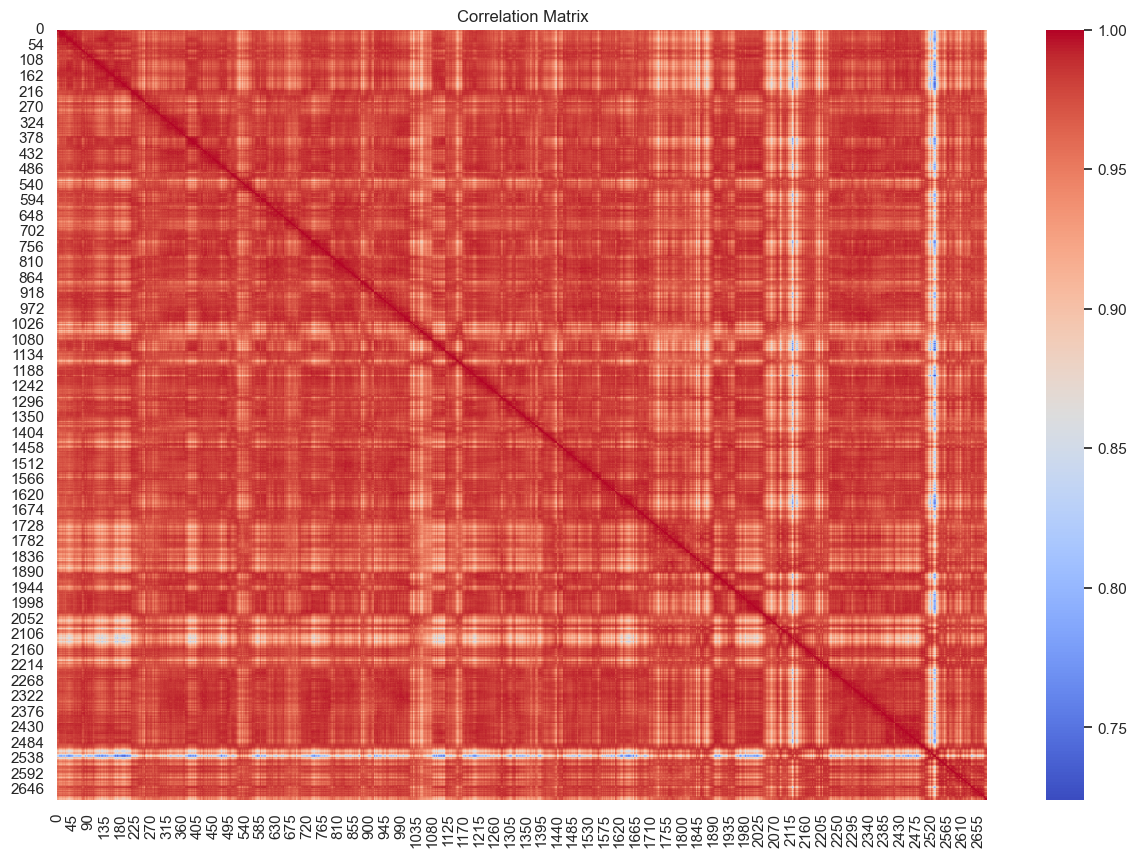

In [10]:
# Calculate correlation matrix
correlation_matrix = torch.zeros((len(alternateithicatom_data['layer_8']), len(alternateithicatom_data['layer_8'])))

for i, tensor_i in enumerate(alternateithicatom_data['layer_8']):
    for j, tensor_j in enumerate(alternateithicatom_data['layer_8']):
        similarity = torch.nn.functional.cosine_similarity(tensor_i.unsqueeze(0), tensor_j.unsqueeze(0))
        correlation_matrix[j, i] = similarity

correlation_matrix_numpy = correlation_matrix.numpy()

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(np.transpose(correlation_matrix_numpy), cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [13]:
alternateithicatom_data = alternateithicatom_data['layer_8']
torch.save(alternateithicatom_data, "bridgetower\\feature_vectors\\story\\alternateithicatom_data.pt")

### 2.3 Run the rest of the stories

In [14]:
avatar_data = get_story_features(avatar)
avatar_data = avatar_data['layer_8']
torch.save(avatar_data, "bridgetower\\feature_vectors\\story\\avatar_data.pt")

Running story through model
10% done
20% done
30% done
40% done
50% done
60% done
70% done
80% done


In [ ]:
howtodraw_data = get_story_features(howtodraw)
howtodraw_data = howtodraw_data['layer_8']
torch.save(howtodraw_data, "bridgetower\\feature_vectors\\story\\howtodraw_data.pt")

In [ ]:
legacy_data = get_story_features(legacy)
legacy_data = legacy_data['layer_8']
torch.save(legacy_data, "bridgetower\\feature_vectors\\story\\legacy_data.pt")

In [ ]:
life_data = get_story_features(life)
life_data = life_data['layer_8']
torch.save(life_data, "bridgetower\\feature_vectors\\story\\life_data.pt")

In [ ]:
myfirstdaywiththeyankees_data = get_story_features(myfirstdaywiththeyankees)
myfirstdaywiththeyankees_data = myfirstdaywiththeyankees_data['layer_8']
torch.save(myfirstdaywiththeyankees_data, "bridgetower\\feature_vectors\\story\\myfirstdaywiththeyankees_data.pt")

In [ ]:
naked_data = get_story_features(naked)
naked_data = naked_data['layer_8']
torch.save(naked_data, "bridgetower\\feature_vectors\\story\\naked_data.pt")

In [ ]:
odetostepfather_data = get_story_features(odetostepfather)
odetostepfather_data = odetostepfather_data['layer_8']
torch.save(odetostepfather_data, "bridgetower\\feature_vectors\\story\\odetostepfather_data.pt")

In [ ]:
souls_data = get_story_features(souls)
souls_data = souls_data['layer_8']
torch.save(souls_data, "bridgetower\\feature_vectors\\story\\souls_data.pt")

In [ ]:
undertheinfluence_data = get_story_features(undertheinfluence)
undertheinfluence_data = undertheinfluence_data['layer_8']
torch.save(undertheinfluence_data, "bridgetower\\feature_vectors\\story\\undertheinfluence_data.pt")

### 2.4 Load the story features

#### All done! Now we have features for both our movie and story data. Time to use them to predict fMRI responses